# **Boosting**

 Boosting is an ensemble technique that combines the predictions of
several base estimators to improve accuracy.
 * The idea is to convert weak learners (classifiers that perform
slightly better than random guessing) into a strong learner.
*  Highlight the practical applications of boosting in industries ,
such as fraud detection, customer churn prediction and ranking in
search engines.

**Key Concepts**
 * Weak Learner :(decision tree)

  A model that performs slightly better than random chance.
 *  Ensemble Learning :

 Combining multiple models to create a more accurate one.
 * Sequential Learning :

 Each subsequent model is trained to correct the errors made
by the previous model.

**TYPES**
1.  AdaBoost (Adaptive Boosting)
2. Gradient Boosting
3. XGBoost (Extreme gradient boosting)

**Advantages**
* High predictive accuracy
* Works well with complex
datasets

**Disadvantages**
* Prone to overfitting ,
especially with noisy data.
* Computationally intensive.

* **Adaptive Boosting (AdaBoost)**: Focuses on hard to
classify cases with simple models.

* **Gradient Boosting** : Focuses on reducing errors through gradient
descent, using more complex models.

* **Extreme Gradient Boosting(XG Boost)**: A more efficient and
powerful version of gradient boosting with additional
optimizations.

# **1. AdaBoost(Adaptive Boosting)**

 * It is the one of the most popular and foundational boosting
algorithms in ML. It is designed to improve the performance of
any learning algorithm.
* improves performance
* weighted trainning sets
* uses decision Trees

**Advantages**
* Improve Accuracy
* Simplicity
* Adaptability- It adapts to the
error of the weak learners ,
improving the focus on difficult
cases.

**Disadvantages**
* Sensitivity to noise
* Requires weak learners - If the
weak learners is too complex ,
 AdaBoost may overfit the data.

# **Example 1**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Automobile_data.csv')
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [ ]:
df.isna().sum()

,0
index,0
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,3


In [ ]:
df.shape

(61, 10)

In [ ]:
df['price']=df['price'].fillna((df['price'].mean()))

In [ ]:
df.isna().sum()

,0
index,0
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,0


In [ ]:
df.dtypes

,0
index,int64
company,object
body-style,object
wheel-base,float64
length,float64
engine-type,object
num-of-cylinders,object
horsepower,int64
average-mileage,int64
price,float64


In [ ]:
df=df.drop(columns='index')

In [ ]:
label_encoder=preprocessing.LabelEncoder()
for i in df:
  df[i]=label_encoder.fit_transform(df[i])

In [ ]:
df.dtypes

,0
company,int64
body-style,int64
wheel-base,int64
length,int64
engine-type,int64
num-of-cylinders,int64
horsepower,int64
average-mileage,int64
price,int64


In [ ]:
x=df.drop(columns='price')
x.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
0,0,0,1,8,0,2,16,7
1,0,0,1,8,0,2,16,7
2,0,2,6,15,5,3,22,6
3,1,3,14,21,3,2,14,10
4,1,3,13,21,3,1,18,5


In [ ]:
y=df['price']
y.head()

,price
0,33
1,40
2,40
3,35
4,42


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=5)

In [ ]:
model=AdaBoostRegressor()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([54.        , 17.78571429, 42.75      , 44.71428571, 42.75      ,
       16.16666667, 53.44444444, 18.66666667,  8.        ,  8.        ,
       16.16666667, 42.57142857, 21.        , 30.        , 37.4       ,
       18.66666667, 39.5       , 27.        , 49.8       ])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 72.98%


In [ ]:
x.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
0,0,0,1,8,0,2,16,7
1,0,0,1,8,0,2,16,7
2,0,2,6,15,5,3,22,6
3,1,3,14,21,3,2,14,10
4,1,3,13,21,3,1,18,5


In [ ]:
x.head()
a=pd.DataFrame([[0,3,4,21,5,5,30,18]])
predict=model.predict(a)
print(f"Price of the automobile will be {predict}Rs")

Price of the automobile will be [42.]Rs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


# **Example 2**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


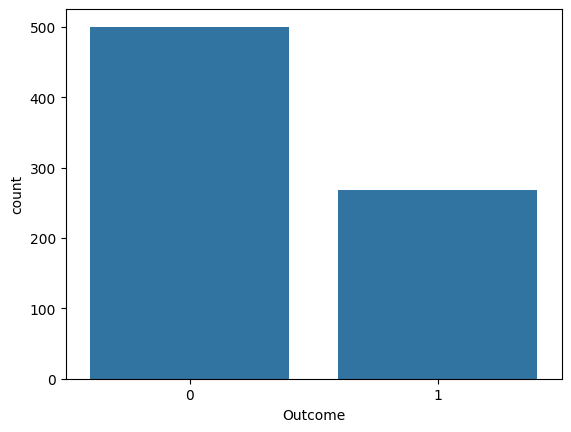

In [ ]:
sn.countplot(df,x='Outcome')
plt.show()

In [ ]:
x=df.drop(columns='Outcome')
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y=df['Outcome']
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=7)

In [ ]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 76.19%


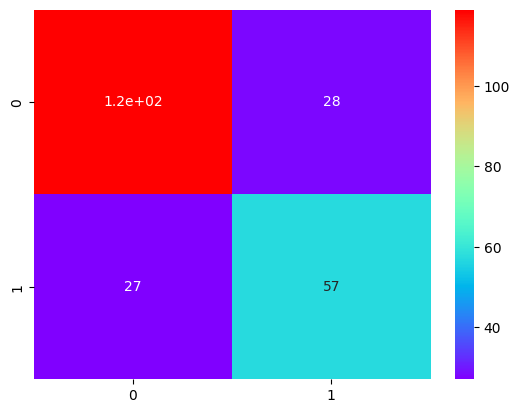

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='rainbow')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.82      0.81      0.81       147\n           1       0.67      0.68      0.67        84\n\n    accuracy                           0.76       231\n   macro avg       0.74      0.74      0.74       231\nweighted avg       0.76      0.76      0.76       231\n'

In [ ]:
x.head()
a=pd.DataFrame([[1,120,90,35,90,20,0.89,23]])
p=model.predict(a)
#print(p)
if p==0:
  print("You don't have diabetes")
else:
  print("You have diabetes")

You don't have diabetes


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


# **Example 3**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
df=df.drop(columns='Unnamed: 0')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
for i in df:
  df[i]=label_encoder.fit_transform(df[i])

In [ ]:
df.dtypes

,0
carat,int64
cut,int64
color,int64
clarity,int64
depth,int64
table,int64
price,int64
x,int64
y,int64
z,int64


In [ ]:
x=df.drop(columns='price')
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,3,2,1,3,83,30,20,26,24
1,1,3,1,2,66,90,14,12,12
2,3,1,1,4,37,115,30,35,12
3,9,3,5,5,92,60,45,51,44
4,11,1,6,3,101,60,59,63,56


In [ ]:
y=df['price']
y.head()
y.tail()

,price
53935,2300
53936,2300
53937,2300
53938,2300
53939,2300


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=9)

In [ ]:
model=AdaBoostRegressor()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([3058.86806248,  845.95575221,  709.18108974, ...,  845.95575221,
        845.95575221, 1822.14707771])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 92.64%


In [ ]:
x.head()
a=pd.DataFrame([[4,3,2,5,90,115,50,63,90]])
p=model.predict(a)
print(f"Price of the diamond {p}Rs")

Price of the diamond [709.18108974]Rs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


# **Example 4**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df=df.drop(columns='customer_id')
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

,0
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64
estimated_salary,float64


In [ ]:
for i in df:
  df[i]=label_encoder.fit_transform(df[i])

In [ ]:
df.dtypes

,0
credit_score,int64
country,int64
gender,int64
age,int64
tenure,int64
balance,int64
products_number,int64
credit_card,int64
active_member,int64
estimated_salary,int64


In [ ]:
x=df.drop(columns='churn')
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,228,0,0,24,2,0,0,1,1,5068
1,217,2,0,23,1,743,0,0,1,5639
2,111,0,0,24,8,5793,2,1,0,5707
3,308,0,0,21,1,0,1,0,0,4704
4,459,2,0,25,2,3696,0,1,1,3925


In [ ]:
y=df['churn']
y.head()

,churn
0,1
1,0
2,1
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [ ]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
flag=0
for i in pred_y:
  if i==1:
    flag+=1
  else:
    flag=0
print(flag)

0


# **2. Gradient Boosting**

Gradient Boosting is a powerful ensemble machine learning
technique used for regression and classification tasks.
* Each new model corrects the errors made by the previous
models.
* The algorithms leverages **gradient descent** (optimizer) to minimize the
loss function , making it a flexible and accurate method(updating the weights).

**Key Concepts :**
 * Ensemble Learning: The technique of combining multiple weak
learners to create a strong predictive model.
 *  Weak Learners : The weak learners in Gradient Boosting are
decision trees with shallow depth, often referred to as “stumps”.
 *  Sequential Model Building: Each model is build sequentially
and the focus is on correcting the errors made by the previous
models.
 *  Gradient Descent : Gradient Boosting uses gradient descent to
minimize  the loss function (Eg: Mean squared error  ).

**ADVANTAGES**
* High predictive accuracy
* Flexibility
* Handles complex relationship

**Disadvantages**
* Prone to Overfitting
* Computationally Intensive
* Sensitive to Hyperparameters

**Hyperparameters**
* n_estimators : no of boosting rounds
* learning_rate : contribution of each trees
* max_depth : maximum depth of the individual trees
* colsample_bytrees : Fraction of features per tree

# **3. Extreme Gradient Boosting(XG Boost)**

   It is an advanced implementation of the Gradient Boosting algorithm ,
designed for speed and performance.
     XG Boost primarily uses decision trees as weak learners , but with
enhancements that improve performance and prevent overfitting.

**ADVANTAGES:**
 * High Performance - It has exceptional speed and performance
* Scalability - It can handle large scale datasets

**DISADVANTAGES**
 * Complexity- It has many hyperparameters challenging to tune effectively
 * Memory Usage - Due to large dataset
 * Overfitting

model=XGBClassifier(n_estimators=45,learning_rate=0.1,max_depth=7,**colsample_bytrees**=9)

# **Example 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/weather_data.csv',parse_dates=['day'])
df.head()

,day,city,temperature,windspeed,event
0,2017-01-01,newyork,32,6,Rain
1,2017-01-04,newyork,36,7,Sunny
2,2017-01-05,newyork,28,12,Snow
3,2017-01-06,newyork,33,7,Sunny
4,2017-01-07,mumbai,90,5,Sunny


In [ ]:
df.isna().sum()

,0
day,0
city,0
temperature,0
windspeed,0
event,0


In [ ]:
df.shape

(12, 5)

In [ ]:
df.dtypes

,0
day,datetime64[ns]
city,object
temperature,int64
windspeed,int64
event,object


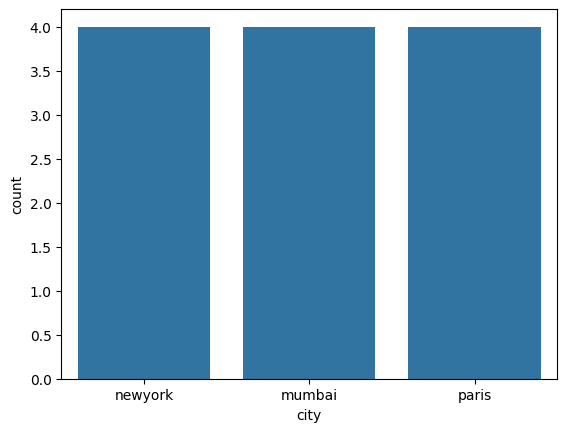

In [ ]:
sn.countplot(df,x='city')
plt.show()

<Axes: xlabel='event', ylabel='count'>

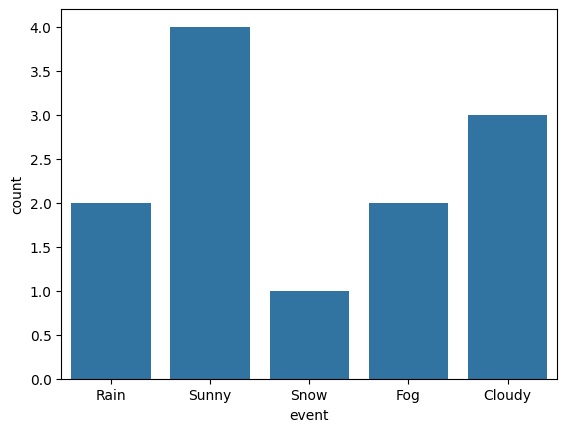

In [ ]:
sn.countplot(df,x='event')

In [ ]:
label_encoder=preprocessing.LabelEncoder()
df['city']=label_encoder.fit_transform(df['city'])
df['event']=label_encoder.fit_transform(df['event'])
df['day']=label_encoder.fit_transform(df['day'])

In [ ]:
df.dtypes

,0
day,int64
city,int64
temperature,int64
windspeed,int64
event,int64


<Axes: xlabel='event', ylabel='count'>

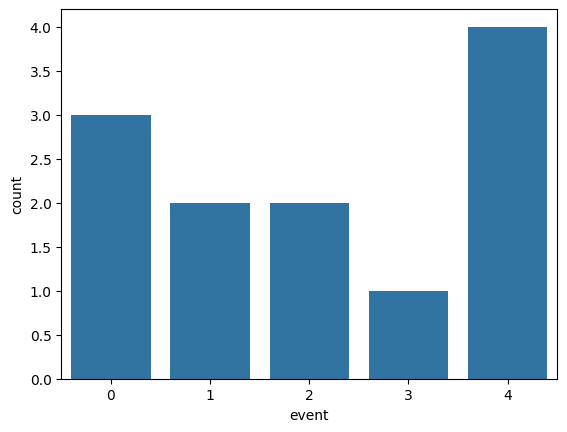

In [ ]:
sn.countplot(df,x='event')

* 0 -> rainy
* 1 -> sunny
* 2 -> snow event
* 3 -> fog
* 4 -> cloudy

In [ ]:
x=df.drop(columns=['event'])
x.head()

,day,city,temperature,windspeed
0,0,1,32,6
1,1,1,36,7
2,2,1,28,12
3,3,1,33,7
4,4,0,90,5


In [ ]:
y=df['event']
y.head()

,event
0,2
1,4
2,3
3,4
4,4


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [ ]:
model=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([3.45390814e+00, 3.45390814e+00, 1.58578704e+00, 4.64824481e-05])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 41.09%


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,pred_y)
print(f'Mean Squared Error = {mse:.2f}')

Mean Squared Error = 1.58


In [ ]:
x.head()
a=pd.DataFrame([[5,3,45,12]])
predict=model.predict(a)
predict=np.round(predict)
#print(predict)
if predict==0:
  print('Rainny')
elif predict==1:
  print('Sunny')
elif predict==2:
  print('Snow')
elif predict==3:
  print('Fog')
else:
  print('Cloudy')

Cloudy


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


# **Example 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


<Axes: xlabel='Outcome', ylabel='count'>

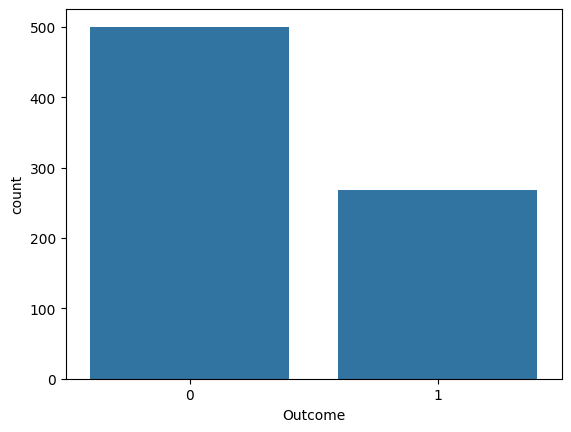

In [ ]:
sn.countplot(df,x='Outcome')

In [ ]:
x=df.drop(columns='Outcome')
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y=df['Outcome']
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=45)

In [ ]:
model=GradientBoostingClassifier(n_estimators=13,learning_rate=0.1,max_depth=5,random_state=13)
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model {np.round((a*100),2)}%")

Accuracy of the model 73.16%


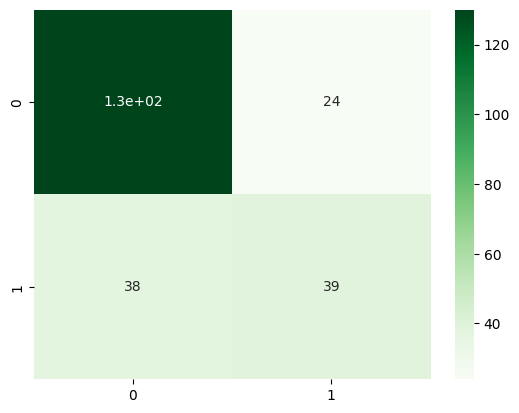

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='Greens')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.77      0.84      0.81       154\n           1       0.62      0.51      0.56        77\n\n    accuracy                           0.73       231\n   macro avg       0.70      0.68      0.68       231\nweighted avg       0.72      0.73      0.72       231\n'

In [ ]:
mse=mean_squared_error(y_test,pred_y)
print(f'Mean Squared Error = {mse:.2f}')

Mean Squared Error = 0.27


# **Example 3**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Automobile_data.csv')
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [ ]:
df=df.drop(columns='index')

In [ ]:
df.isna().sum()

,0
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,3


In [ ]:
df['price']=df['price'].fillna((df['price'].mean()))

In [ ]:
df.isna().sum()

,0
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,0


In [ ]:
df.shape

(61, 9)

In [ ]:
df.dtypes

,0
company,object
body-style,object
wheel-base,float64
length,float64
engine-type,object
num-of-cylinders,object
horsepower,int64
average-mileage,int64
price,float64


In [ ]:
label_encoder=preprocessing.LabelEncoder()
for i in df:
  df[i]=label_encoder.fit_transform(df[i])

In [ ]:
df.dtypes

,0
company,int64
body-style,int64
wheel-base,int64
length,int64
engine-type,int64
num-of-cylinders,int64
horsepower,int64
average-mileage,int64
price,int64


In [ ]:
x=df.drop(columns='price')
x.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
0,0,0,1,8,0,2,16,7
1,0,0,1,8,0,2,16,7
2,0,2,6,15,5,3,22,6
3,1,3,14,21,3,2,14,10
4,1,3,13,21,3,1,18,5


In [ ]:
y=df['price']
y.head()

,price
0,33
1,40
2,40
3,35
4,42


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=37)

In [ ]:
model=XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=9,random_state=13,colsample_bytrees=.5)
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:01:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "colsample_bytrees" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


array([ 4.084281 , 36.938248 ,  9.9453945,  2.3069046,  4.114008 ,
       39.97262  , 47.365494 , 39.979603 , 41.800316 , 45.762764 ,
        7.05467  , 53.404408 , 36.574818 , 25.97548  ,  6.005438 ,
       54.165108 , 41.800316 , 30.108809 , 51.050797 ], dtype=float32)

In [ ]:
a=model.score(x_test,y_test)
print(f"accuracy of the model : {np.round((a*100),2)}%")

accuracy of the model : 83.66%


In [ ]:
x.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
0,0,0,1,8,0,2,16,7
1,0,0,1,8,0,2,16,7
2,0,2,6,15,5,3,22,6
3,1,3,14,21,3,2,14,10
4,1,3,13,21,3,1,18,5


In [ ]:
a=pd.DataFrame([[0,1,14,21,5,6,22,12]],columns=x_train.columns)
p=model.predict(a)
print(p)

[36.364628]


# **Example 4**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
x=df.drop(columns='Outcome')
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y=df['Outcome']
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
model=XGBClassifier(n_estimators=45,learning_rate=0.1,max_depth=7,colsample_bytrees=.9)
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:01:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "colsample_bytrees" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 72.29%


In [ ]:
mse=mean_squared_error(y_test,pred_y)
print(f"{mse:.2f}")

0.28


<Axes: >

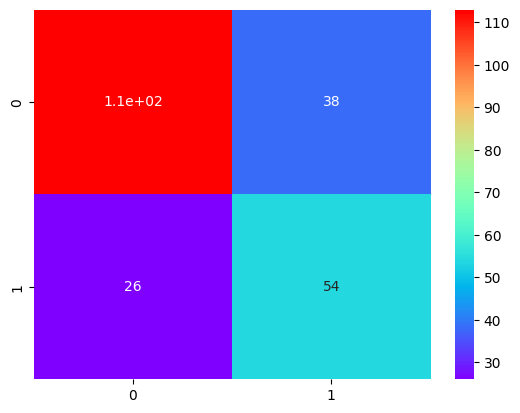

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='rainbow')

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.81      0.75      0.78       151\n           1       0.59      0.68      0.63        80\n\n    accuracy                           0.72       231\n   macro avg       0.70      0.71      0.70       231\nweighted avg       0.73      0.72      0.73       231\n'

In [ ]:
x.head()
a=pd.DataFrame([[0,90,140,29,90,20,0.98,23]],columns=x_train.columns)
p=model.predict(a)
#print(p)
if p==0:
  print("You dont't have diabetes")
else:
  print("you have diabetes")

You dont't have diabetes
